In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install --upgrade albumentations
# !git clone https://github.com/frgfm/torch-cam.git
# !pip install -e torch-cam/.

In [4]:
! rm -rf ./Weights_Heist_Flow/

In [5]:
! git clone https://github.com/eva7wandb/Weights_Heist_Flow.git

Cloning into 'Weights_Heist_Flow'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 164 (delta 68), reused 73 (delta 21), pack-reused 0
Receiving objects: 100% (164/164), 414.63 KiB | 0 bytes/s, done.
Resolving deltas: 100% (68/68), done.
Checking connectivity... done.


In [6]:
# %cd /content/Weights_Heist_Flow
# ! pwd

In [7]:
import sys
sys.path.append('./Weights_Heist_Flow/')

In [8]:
from main import Trainer, show_misclassification, show_loss_curves
from models import custom_resnet, resnet #, cus_resnet

[INFO] seed set 1
[INFO] Cuda Avaliable :  True
[INFO] device :  cuda


[INFO] Loading Data


/data/safe/envs/py_38_env/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
[INFO] train dataset of size 50000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,728
         MaxPool2d-4          [-1, 128, 16, 16]               0
       BatchNorm2d-5          [-1, 128, 16, 16]             256
            XBlock-6          [-1, 128, 16, 16]               0
            Conv2d-7          [-1, 128, 16, 16]         147,456
       BatchNorm2d-8          [-1, 128, 16, 16]             256
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10       

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.13E-01


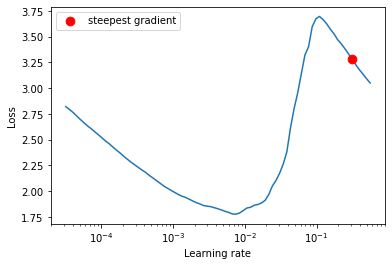

few steps before and after best_loss
(relative step, lr, loss)
(-5, 0.00423, 1.829)
(-4, 0.00475, 1.81686)
(-3, 0.00534, 1.80384)
(-2, 0.00599, 1.79301)
(-1, 0.00673, 1.77833)
(0, 0.00756, 1.77717)
(1, 0.0085, 1.78842)
(2, 0.00955, 1.81259)
(3, 0.01072, 1.83655)
(4, 0.01205, 1.84344)
----------------------------------------------------------------
TEST         Loss:2.3022         Acc:9.87         [987 / 10000]


In [9]:
## running to get the appropriate lr
trainer = Trainer(
    custom_resnet.CustomResNet(), lr=0.00001, batch_size=512, 
    scheduler='OneCycleLR', label_smoothing=0.05,
    optimizer='Adam', run_find_lr=True
)

In [11]:
trainer = Trainer(
    custom_resnet.CustomResNet(), lr=0.00673, batch_size=512, 
    scheduler='OneCycleLR', label_smoothing=0.05,
    optimizer='Adam', run_find_lr=False
)

[INFO] Loading Data
Files already downloaded and verified
[INFO] train dataset of size 50000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,728
         MaxPool2d-4          [-1, 128, 16, 16]               0
       BatchNorm2d-5          [-1, 128, 16, 16]             256
            XBlock-6          [-1, 128, 16, 16]               0
            Conv2d-7          [-1, 128, 16, 16]         147,456
       BatchNorm2d-8          [-1, 128, 16, 16]             256
            Conv2d-9          [-1, 128, 16, 16]         147,456
      B

In [12]:
trainer.train_model(epochs=24)

[INFO] Begin training for 24 epochs.


TRAIN Epoch:0 Loss:1.1352 Batch:97 Acc:51.19: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]


TEST         Loss:1.2821         Acc:59.61         [5961 / 10000]


TRAIN Epoch:1 Loss:1.0321 Batch:97 Acc:70.07: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


TEST         Loss:1.0070         Acc:72.14         [7214 / 10000]


TRAIN Epoch:2 Loss:0.8003 Batch:97 Acc:76.09: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


TEST         Loss:0.8870         Acc:77.10         [7710 / 10000]


TRAIN Epoch:3 Loss:0.7558 Batch:97 Acc:79.15: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]


TEST         Loss:0.8107         Acc:80.50         [8050 / 10000]


TRAIN Epoch:4 Loss:0.6904 Batch:97 Acc:80.77: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]


TEST         Loss:0.9716         Acc:75.17         [7517 / 10000]


TRAIN Epoch:5 Loss:0.7227 Batch:97 Acc:84.14: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]


TEST         Loss:0.7272         Acc:84.84         [8484 / 10000]


TRAIN Epoch:6 Loss:0.6324 Batch:97 Acc:86.79: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


TEST         Loss:0.6974         Acc:85.23         [8523 / 10000]


TRAIN Epoch:7 Loss:0.5636 Batch:97 Acc:88.99: 100%|██████████| 98/98 [00:21<00:00,  4.46it/s]


TEST         Loss:0.6457         Acc:87.29         [8729 / 10000]


TRAIN Epoch:8 Loss:0.589 Batch:97 Acc:90.18: 100%|██████████| 98/98 [00:21<00:00,  4.57it/s] 


TEST         Loss:0.6499         Acc:87.26         [8726 / 10000]


TRAIN Epoch:9 Loss:0.5344 Batch:97 Acc:91.30: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


TEST         Loss:0.5940         Acc:89.25         [8925 / 10000]


TRAIN Epoch:10 Loss:0.5338 Batch:97 Acc:92.15: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]


TEST         Loss:0.5897         Acc:89.39         [8939 / 10000]


TRAIN Epoch:11 Loss:0.5063 Batch:97 Acc:93.13: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


TEST         Loss:0.5707         Acc:90.31         [9031 / 10000]


TRAIN Epoch:12 Loss:0.4768 Batch:97 Acc:93.95: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


TEST         Loss:0.5680         Acc:89.87         [8987 / 10000]


TRAIN Epoch:13 Loss:0.4661 Batch:97 Acc:94.36: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]


TEST         Loss:0.5594         Acc:90.40         [9040 / 10000]


TRAIN Epoch:14 Loss:0.4533 Batch:97 Acc:95.43: 100%|██████████| 98/98 [00:20<00:00,  4.67it/s]


TEST         Loss:0.5616         Acc:90.64         [9064 / 10000]


TRAIN Epoch:15 Loss:0.4072 Batch:97 Acc:96.04: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


TEST         Loss:0.5401         Acc:90.90         [9090 / 10000]


TRAIN Epoch:16 Loss:0.4412 Batch:97 Acc:96.31: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


TEST         Loss:0.5352         Acc:91.07         [9107 / 10000]


TRAIN Epoch:17 Loss:0.3971 Batch:97 Acc:96.92: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


TEST         Loss:0.5138         Acc:92.21         [9221 / 10000]


TRAIN Epoch:18 Loss:0.3648 Batch:97 Acc:97.62: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


TEST         Loss:0.5014         Acc:92.63         [9263 / 10000]


TRAIN Epoch:19 Loss:0.3588 Batch:97 Acc:97.70: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]


TEST         Loss:0.5062         Acc:92.19         [9219 / 10000]


TRAIN Epoch:20 Loss:0.3452 Batch:97 Acc:98.07: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


TEST         Loss:0.4859         Acc:93.10         [9310 / 10000]


TRAIN Epoch:21 Loss:0.3715 Batch:97 Acc:98.37: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]


TEST         Loss:0.4883         Acc:92.96         [9296 / 10000]


TRAIN Epoch:22 Loss:0.3435 Batch:97 Acc:98.75: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]


TEST         Loss:0.4799         Acc:93.26         [9326 / 10000]


TRAIN Epoch:23 Loss:0.3611 Batch:97 Acc:98.88: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


TEST         Loss:0.4746         Acc:93.51         [9351 / 10000]


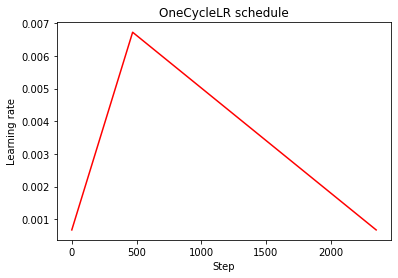

In [13]:
import matplotlib.pyplot as plt

plt.title('OneCycleLR schedule')
plt.ylabel('Learning rate')
plt.xlabel('Step')
plt.plot(trainer.lr_logs, c='red')
plt.show()

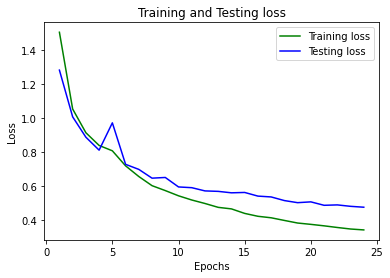

In [14]:
show_loss_curves(trainer.logs)